In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('ayam_pedaging_fix.csv')
df.sample()

,Kota,Populasi 2017,Populasi 2018,Produksi 2017,Produksi 2018,Skala Produksi
14,Sidoarjo,85400.0,347403.0,13380000.0,13459500.0,Tinggi


In [19]:
df = df.drop(['Kota'], axis=1)
df.sample()

,Populasi 2017,Populasi 2018,Produksi 2017,Produksi 2018,Skala Produksi
9,2939046.0,3183304.0,3468020.0,3819864.0,Tinggi


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Populasi 2017   38 non-null     float64
 1   Populasi 2018   38 non-null     float64
 2   Produksi 2017   38 non-null     float64
 3   Produksi 2018   38 non-null     float64
 4   Skala Produksi  38 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.6+ KB


In [21]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)


for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [22]:
numerical

['Populasi 2017', 'Populasi 2018', 'Produksi 2017', 'Produksi 2018']

In [23]:
catgcols

['Skala Produksi']

In [24]:
df['Skala Produksi'].value_counts()

Skala Produksi
Rendah    19
Tinggi    19
Name: count, dtype: int64

In [25]:
ind_col = [col for col in df.columns if col != 'Skala Produksi']
dep_col = 'Skala Produksi'

In [26]:
df[dep_col].value_counts()

Skala Produksi
Rendah    19
Tinggi    19
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] =  le.fit_transform(df[col])

In [ ]:
df['Skala Produksi'] = le.fit_transform(df['Skala Produksi'])

In [29]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [30]:
df.head()

,Populasi 2017,Populasi 2018,Produksi 2017,Produksi 2018,Skala Produksi
0,854900.0,992350.0,1026960.0,1038660.0,0
1,2329290.0,2383600.0,2795148.0,2552413.0,0
2,2028354.0,2089204.0,2434025.0,2507045.0,0
3,4818398.0,8644073.0,5780182.0,10052845.0,1
4,4016800.0,4030800.0,5566800.0,14526988.0,1


In [31]:
df.to_csv('broiler_bersih.csv', index=False)

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))

# tn, fp, fn, tp = confusion.ravel()
print(f"classifiction report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 1.0
akurasi data testing = 1.0 

confusion matrix : 
[[4 0]
 [0 4]]

classifiction report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [42]:
import pandas as pd

df = pd.read_csv('ayam_pedaging_fix.csv')

kota = df['Kota']
data = df[['Populasi 2017', 'Populasi 2018', 'Produksi 2017', 'Produksi 2018']]

input_data = [854900.0,992350.0,1026960.0,1038660.0]

matching_rows = data[data.eq(input_data).all(axis=1)]

if len(matching_rows) > 0:
    matching_kota = kota.iloc[matching_rows.index[0]]

    prediction = model.predict(data)

    if prediction[0] == 0:
        print(f"Skala Produksi Ayam Pedaging di kota {matching_kota} rendah")
    else:
        print(f"Skala Produksi Ayam Pedaging di kota {matching_kota} tinggi")


Skala Produksi Ayam Pedaging di kota Pacitan rendah


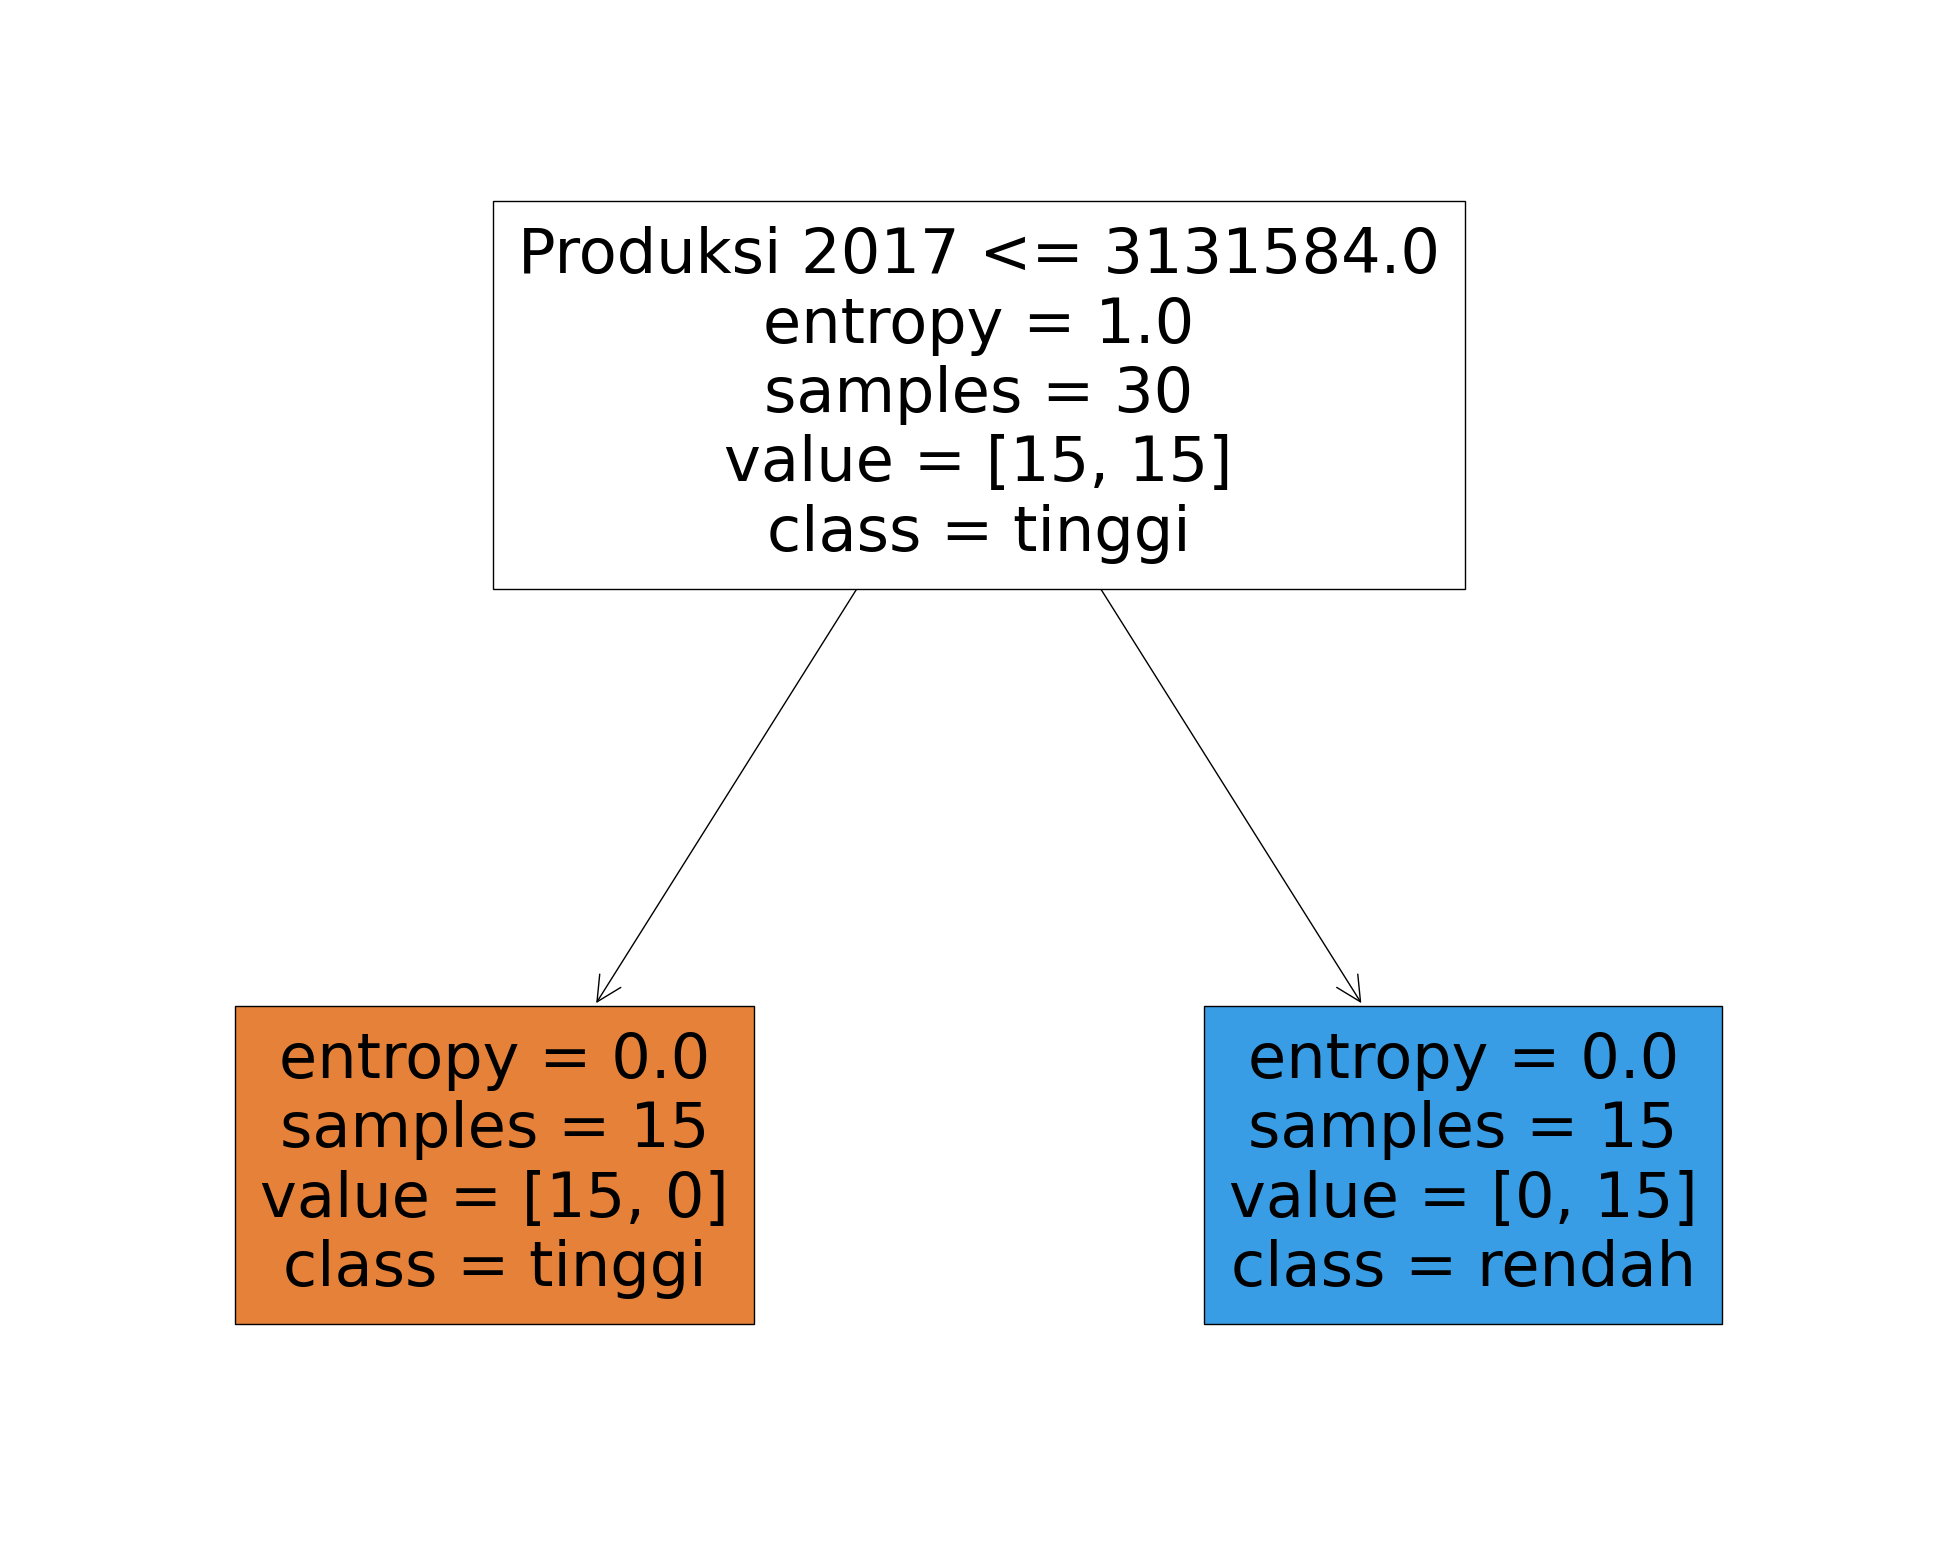

In [43]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                    feature_names=ind_col,
                    class_names=['tinggi','rendah'],
                    filled=True)